#### Rex Gayas
#### Week 12 12.2 Project Milestone 5B Spring 2024
#### DSC410-T301 Predictive Analytics (2245-1)
#### Final Project & Further Investigation (Neural Net)

#### Data Description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
diabetic_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Spring 2024\Predictive Analytics\Project\diabetes+130-us+hospitals+for+years+1999-2008\diabetic_data.csv')


# Data description
print(diabetic_data.describe())
print(diabetic_data.info())

# Check the first few rows to understand what the data looks like
print(diabetic_data.head())


       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

The dataset is a collection from 130 US hospitals concerning encounters with diabetic patients from 1999-2008. It comprises over 100,000 records and 50 attributes, including patient number, race, gender, age, weight, admission type, time in hospital, medical specialty, and various results from lab tests. 

#### Handling Missing Data in the 'Weight' Column

In [2]:
import pandas as pd

# Define the file paths
file_path = "D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/diabetic_data.csv"
updated_file_path = "D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/updated_diabetic_data.csv"

# Load the dataset
diabetic_data = pd.read_csv(file_path)

# Count of missing values in the 'weight' column represented by '?'
missing_weight_count = (diabetic_data['weight'] == '?').sum()
print(f"Count of missing values in 'weight': {missing_weight_count}")

# Dropping the 'weight' column
diabetic_data.drop('weight', axis=1, inplace=True)

# Saving the updated dataset without the 'weight' column
diabetic_data.to_csv(updated_file_path, index=False)

print("The 'weight' column has been dropped and the updated dataset is saved.")



Count of missing values in 'weight': 98569
The 'weight' column has been dropped and the updated dataset is saved.


The weight column in the dataset has a significantly high proportion of missing data, with approximately 96.86% of the values being missing. This poses a substantial challenge for any analytical or predictive modeling tasks, as such a large amount of missing information can severely bias the results if not addressed properly. Given the severity of missing data, the most straightforward and statistically sound approach is to remove this column from the dataset.

#### Variable Types

In [3]:
import pandas as pd

# Define numerical and categorical variables 
numerical_variables = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]

categorical_variables = [
    'race', 'gender', 'age', 'weight', 'admission_type_id',
    'discharge_disposition_id', 'admission_source_id', 'medical_specialty',
    # Medication refers to all medication columns provided in the dataset
    'metformin', 'repaglinide', 'nateglinide', # etc...
]

# Create a DataFrame for numerical variables
numerical_df = pd.DataFrame({'Numerical Variables': numerical_variables})

# Create a DataFrame for categorical variables
categorical_df = pd.DataFrame({'Categorical Variables': categorical_variables})

# Display the DataFrames
print("Numerical Variables Table:")
print(numerical_df)
print("\nCategorical Variables Table:")
print(categorical_df)


Numerical Variables Table:
  Numerical Variables
0    time_in_hospital
1  num_lab_procedures
2      num_procedures
3     num_medications
4   number_outpatient
5    number_emergency
6    number_inpatient
7    number_diagnoses

Categorical Variables Table:
       Categorical Variables
0                       race
1                     gender
2                        age
3                     weight
4          admission_type_id
5   discharge_disposition_id
6        admission_source_id
7          medical_specialty
8                  metformin
9                repaglinide
10               nateglinide


There are numerical variables which are quantities that can be measured. They can be further classified into discrete (e.g., the number of times a patient was admitted to the hospital) or continuous variables (e.g., patient's age).

There are categorical variables; these are qualitative and describe a quality or characteristic. They can be nominal (e.g., race, gender, which don't have a particular order) or ordinal (e.g., age categorized into ranges like 0-10, 10-20, which has a meaningful order).

#### Initial Data Cleaning

In [4]:
import pandas as pd

# Define the file path for the updated dataset
file_path = "D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/updated_diabetic_data.csv"

# Load the dataset
diabetic_data = pd.read_csv(file_path)

# Identify object columns
object_columns = diabetic_data.select_dtypes(include=['object']).columns

# Apply vectorized string operations for cleaning
for column in object_columns:
    if diabetic_data[column].dtype == 'object':
        # Check if a column contains string representations of numbers (possibly with misplaced commas or 'x's)
        # Remove commas and 'x's, then convert the column to numeric
        diabetic_data[column] = pd.to_numeric(diabetic_data[column].str.replace('[,x]', '', regex=True), errors='coerce')

# Check the new data types after cleaning
data_types_after_optimized_cleaning = diabetic_data.dtypes

print(data_types_after_optimized_cleaning)


encounter_id                  int64
patient_nbr                   int64
race                        float64
gender                      float64
age                         float64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
payer_code                  float64
medical_specialty           float64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
max_glu_serum               float64
A1Cresult                   float64
metformin                   float64
repaglinide                 float64
nateglinide                 float64
chlorpropamide              float64
glimepiride                 

Several columns that were originally of the object type and contained numeric-like data have been converted to float64. This includes columns that likely represent categorical data coded as numbers, which is why they're showing up as float64 after conversion. These columns should be reviewed to confirm which should be converted back to categorical (object or category type) and address the missing values as NaNs introduced during coercion.

#### Categorical Conversion

In [5]:
# Convert columns to 'category' data type
categorical_columns = [
    'race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 
    'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult',
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone',
    'change', 'diabetesMed', 'readmitted'
]

for column in categorical_columns:
    if column in diabetic_data.columns:
        diabetic_data[column] = diabetic_data[column].astype('category')

# Check for missing values in the dataset
missing_values_after_reverting = diabetic_data.isnull().sum()

# Output the updated data types and missing values information
data_types_after_reverting = diabetic_data.dtypes

print(missing_values_after_reverting, data_types_after_reverting)



encounter_id                     0
patient_nbr                      0
race                        101766
gender                      101766
age                         101766
admission_type_id                0
discharge_disposition_id         0
admission_source_id              0
time_in_hospital                 0
payer_code                  101766
medical_specialty           101766
num_lab_procedures               0
num_procedures                   0
num_medications                  0
number_outpatient                0
number_emergency                 0
number_inpatient                 0
diag_1                        1666
diag_2                        2894
diag_3                        6481
number_diagnoses                 0
max_glu_serum               101766
A1Cresult                   101766
metformin                   101766
repaglinide                 101766
nateglinide                 101766
chlorpropamide              101766
glimepiride                 101766
acetohexamide       

Identified columns in the dataset that represent categorical data and converted their data types from float64 to category. This conversion aligns the data types with the nature of the data, ensuring that categorical variables are treated appropriately in subsequent analyses. The process also involved identifying missing values, which are now accurately represented as NaNs within these categorical columns.

#### Updated Missing Value Imputation Strategy

In [6]:
import pandas as pd

# Define the file path for the updated dataset
file_path = "D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/updated_diabetic_data.csv"

# Load the dataset
diabetic_data = pd.read_csv(file_path)

# Impute missing values for categorical columns, excluding 'max_glu_serum' and 'A1Cresult'
categorical_columns = diabetic_data.select_dtypes(include=['category']).columns.difference(['max_glu_serum', 'A1Cresult'])
for column in categorical_columns:
    diabetic_data[column] = diabetic_data[column].cat.add_categories(['Unknown']).fillna('Unknown')

# Impute missing values for numerical columns, ensuring not to include the excluded columns
numerical_columns = diabetic_data.select_dtypes(include=['int64', 'float64']).columns
excluded_columns = ['max_glu_serum', 'A1Cresult']  # Columns not to impute
for column in numerical_columns:
    if diabetic_data[column].isnull().any() and column not in excluded_columns:
        median_value = diabetic_data[column].median()
        diabetic_data[column] = diabetic_data[column].fillna(median_value)

# Save the changes into a new updated file
updated_file_path = "D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/further_updated_diabetic_data.csv"
diabetic_data.to_csv(updated_file_path, index=False)

# Check the missing values count after imputation
missing_values_after_imputation = diabetic_data.isnull().sum()

print(missing_values_after_imputation)



encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

For categorical columns, missing values were handled by adding “Unknown” as a category and then filling any missing entries with this label. This makes sure that all categorical data maintains a consistent format without introducing statistical biases associated with arbitrary fill values. Numerical columns with missing data were imputed using the median value of each column. This method was selected to preserve the statistical distribution of numerical data as closely as possible, avoiding the influence of outliers. With Professor Neugebauer’s guidance, the columns “max_glu_serum” and “A1Cresult” were excluded from any imputation process as to avoid altering the statistical makeup of these features. 

#### Exploratory Data Analysis

C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

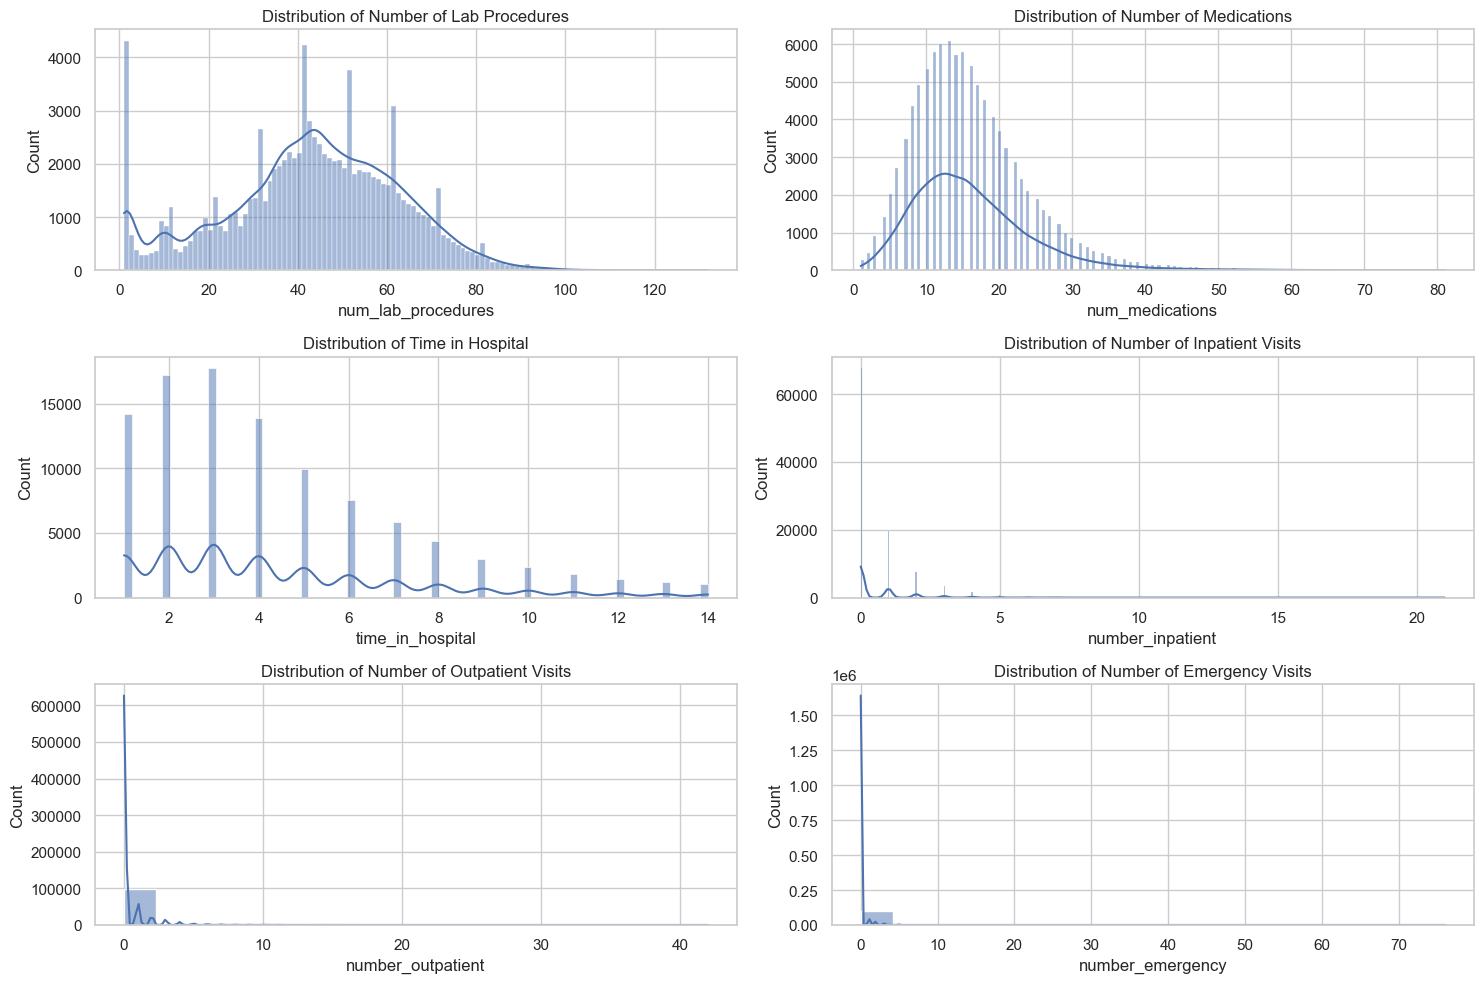

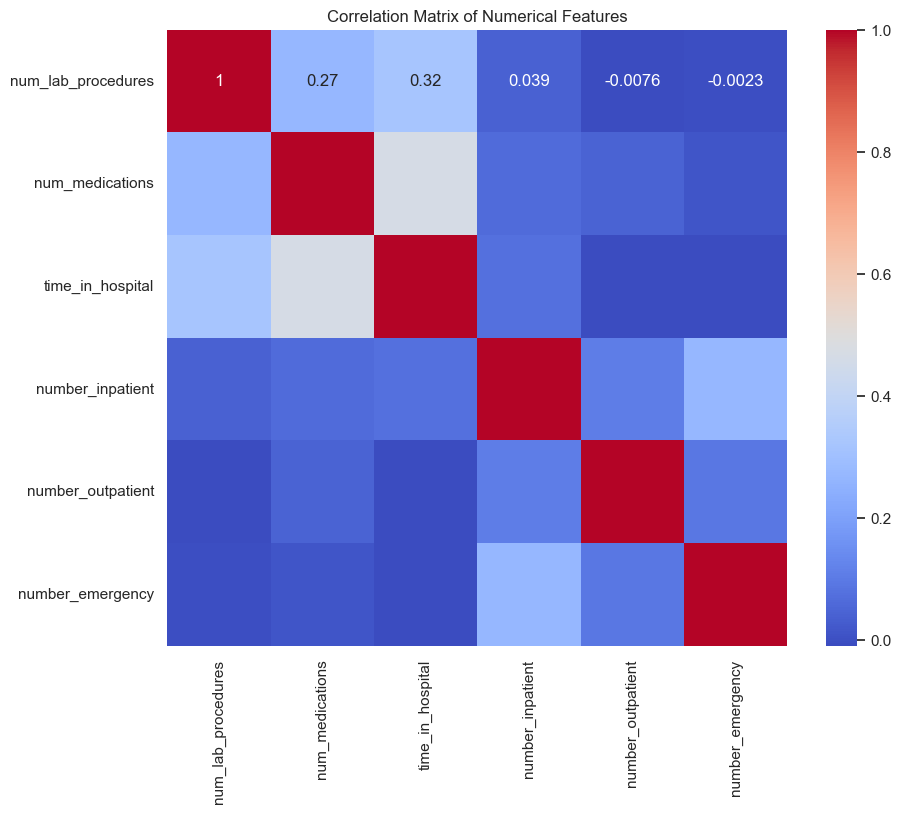

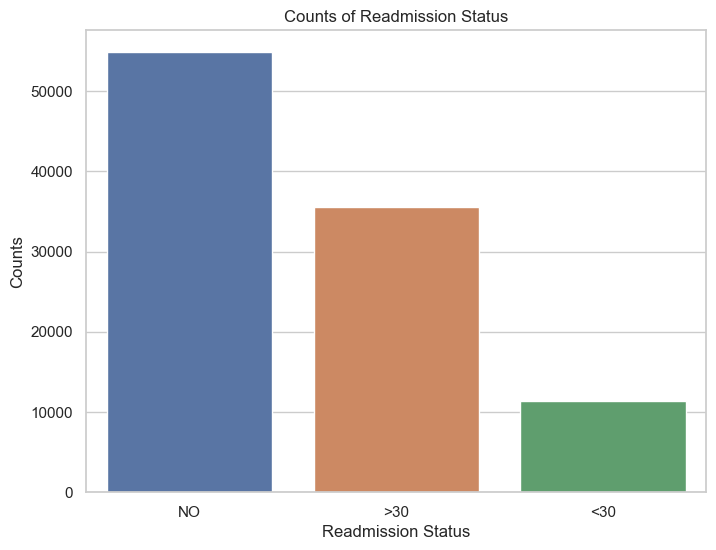

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting the seaborn style
sns.set(style="whitegrid") 

# Distribution analysis for key numerical features 
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
sns.histplot(diabetic_data['num_lab_procedures'], kde=True)
plt.title('Distribution of Number of Lab Procedures')

plt.subplot(3, 2, 2)
sns.histplot(diabetic_data['num_medications'], kde=True)
plt.title('Distribution of Number of Medications')

plt.subplot(3, 2, 3)
sns.histplot(diabetic_data['time_in_hospital'], kde=True)
plt.title('Distribution of Time in Hospital')

plt.subplot(3, 2, 4)
sns.histplot(diabetic_data['number_inpatient'], kde=True)
plt.title('Distribution of Number of Inpatient Visits')

plt.subplot(3, 2, 5)
sns.histplot(diabetic_data['number_outpatient'], kde=True)
plt.title('Distribution of Number of Outpatient Visits')

plt.subplot(3, 2, 6)
sns.histplot(diabetic_data['number_emergency'], kde=True)
plt.title('Distribution of Number of Emergency Visits')

plt.tight_layout()

# Correlation matrix visualization 
plt.figure(figsize=(10, 8))
correlation_matrix = diabetic_data[['num_lab_procedures', 'num_medications', 'time_in_hospital', 'number_inpatient', 'number_outpatient', 'number_emergency']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Numerical Features')

# Bar plot for the 'readmitted' target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='readmitted', data=diabetic_data)
plt.title('Counts of Readmission Status')
plt.xlabel('Readmission Status')
plt.ylabel('Counts')

plt.show()


Examined the diabetic patient dataset and focused on variables relevant to hospital readmissions. Computed summary statistics for key features like lab procedures, medication counts, and hospital stay duration. Histograms showed the distribution of these numerical features, revealing their spread and tendencies. A heatmap displayed the correlation between numerical features, highlighting potential relationships important for predictive modeling. Visualized the distribution of the readmitted target variable through a bar chart. The visualizations show a wide range of values for the number of lab procedures and medications, with a general trend towards shorter hospital stays and fewer inpatient, outpatient, and emergency visits. The readmission status may serve as a foundation for modeling readmission risks.

#### Outlier Identification

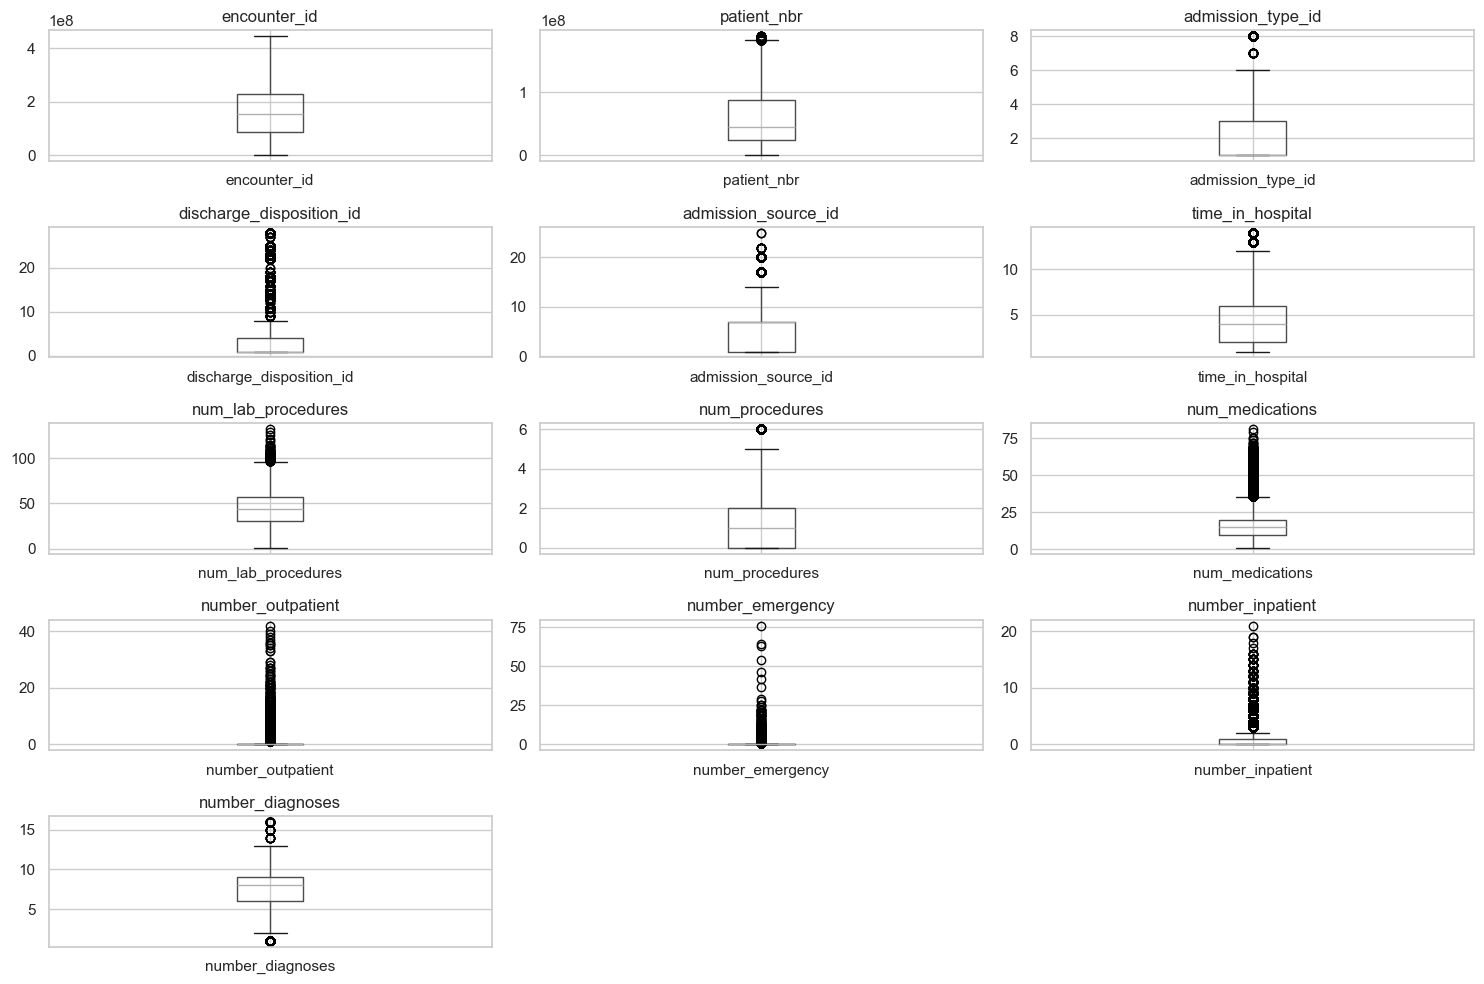

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the latest path
file_path = "D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/further_updated_diabetic_data.csv"
diabetic_data = pd.read_csv(file_path)

# Identifying numerical columns for the outlier analysis
numerical_columns = diabetic_data.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for each numerical variable
plt.figure(figsize=(15, 10))
for index, column in enumerate(numerical_columns):
    plt.subplot((len(numerical_columns) // 3) + 1, 3, index + 1)
    diabetic_data.boxplot(column)
    plt.title(column)

plt.tight_layout()
plt.show()




Plotted boxplots for each numerical variable in the dataset. These plots highlighted the potential outliers, especially visible as points that fall outside of the whiskers of the boxplots. Some variables, like num_medications, number_outpatient, number_emergency, and number_inpatient, show a significant number of points beyond the upper whisker, indicating the presence of outliers.

It would be necessary to study these outliers and decide whether they should be kept if they represent true extreme values that are important for prediction, capping them at a certain value, or removing them if they are deemed to be data entry errors or not relevant for the subsequent analysis.

#### Bivariate Relationship Exploration

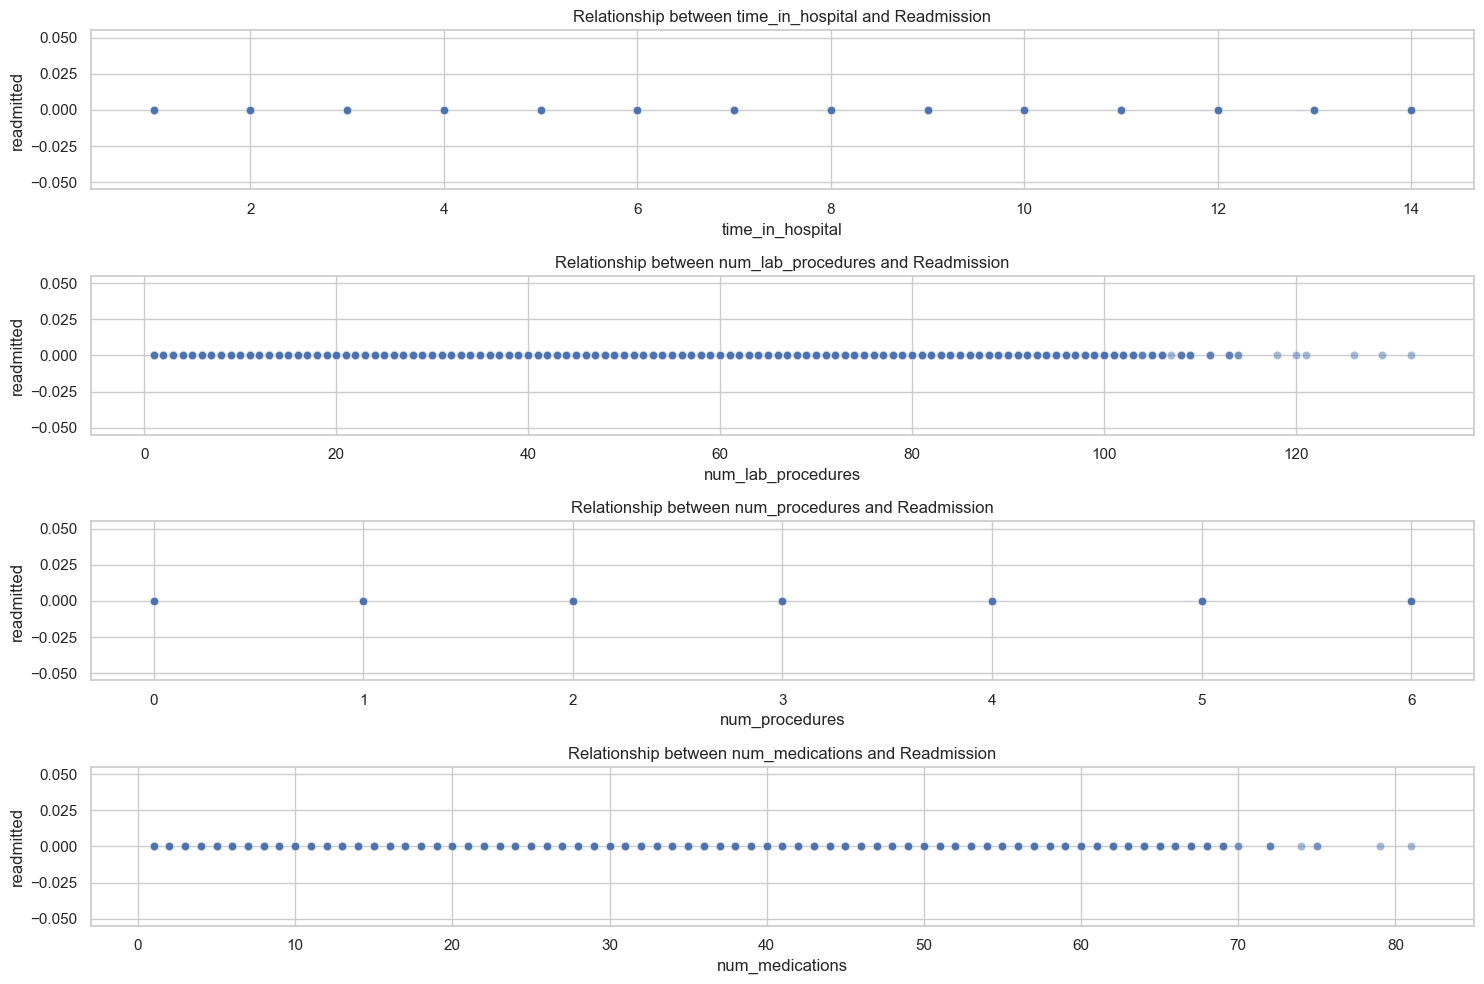

In [9]:
import seaborn as sns

# Considering a few numerical column and the target variable 'readmitted'
# This will need to be encoded numerically for certain types of plots
selected_numerical_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications']
target_variable = 'readmitted'

# Convert the target variable to numeric for plotting 
diabetic_data[target_variable] = diabetic_data[target_variable].apply(lambda x: 1 if x == 'Yes' else 0)

# Plotting scatter plots for selected numerical columns against the target variable
plt.figure(figsize=(15, 10))
for index, column in enumerate(selected_numerical_columns):
    plt.subplot(len(selected_numerical_columns), 1, index + 1)
    sns.scatterplot(data=diabetic_data, x=column, y=target_variable, alpha=0.5)
    plt.title(f'Relationship between {column} and Readmission')
plt.tight_layout()
plt.show()


Created scatter plots to visualize the relationship between selected numerical features and the binary readmission status. These plots attempt to indicate whether there is a linear relationship, clustering, or any other noticeable pattern between these features and readmission. There don't appear to be distinct linear relationships, but these plots are valuable for a first pass at identifying patterns.

#### Feature Correlation Analysis (Pearson)

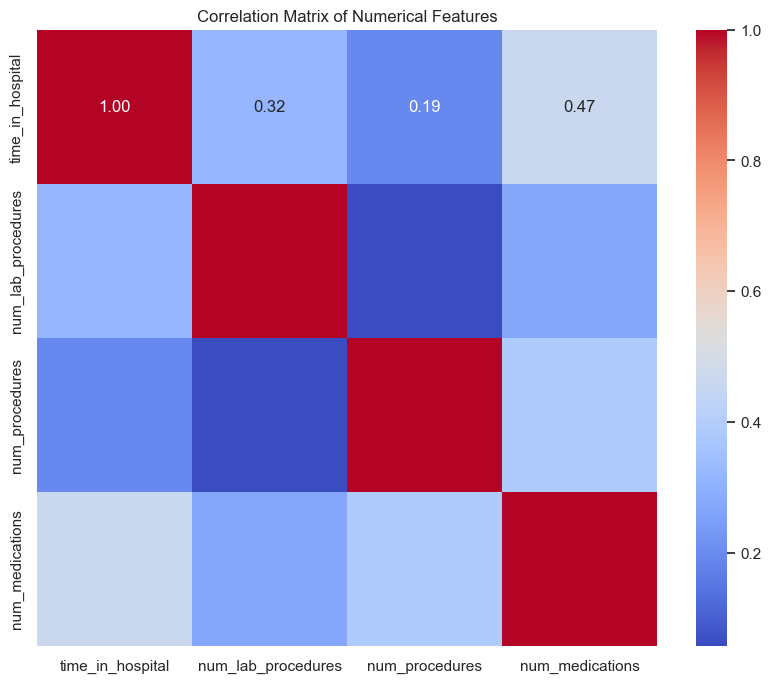

In [10]:
# Calculate the correlation matrix for numerical features
correlation_matrix = diabetic_data[selected_numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


The heatmap above displays the Pearson correlation coefficients between selected numerical features. The correlations range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

From the heatmap, it was noted that time_in_hospital has a moderate positive correlation with num_medications, which might indicate that longer hospital stays could involve more medications. num_lab_procedures and num_procedures have lower correlations with other variables, suggesting they might provide unique information not represented by other features. No extremely high correlations are evident among these selected features, which reduces concerns about multicollinearity in these data.

#### Categorical Feature Reduction and Encoding (Week 5)

In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Load the dataset from the latest path
file_path = "D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/further_updated_diabetic_data.csv"
diabetic_data = pd.read_csv(file_path)

# Categorical feature reduction and encoding
categorical_columns = diabetic_data.select_dtypes(include=['object', 'category']).columns
threshold = 100
for column in categorical_columns:
    counts = diabetic_data[column].value_counts()
    other_categories = counts[counts < threshold].index
    diabetic_data[column] = diabetic_data[column].replace(other_categories, 'Other')

encoder = OneHotEncoder(drop='first')
sparse_encoded_features = encoder.fit_transform(diabetic_data[categorical_columns])

# Aggregating medication adjustments into a single feature
medication_columns = [col for col in diabetic_data.columns if 'glipizide' in col or 'glyburide' in col or 'pioglitazone' in col or 'rosiglitazone' in col or 'insulin' in col]
def count_medication_changes(row):
    return sum(row[col] in ['Up', 'Down'] for col in medication_columns)

diabetic_data['medication_changes'] = diabetic_data.apply(count_medication_changes, axis=1)

# Normalization of numerical features for model input
numerical_columns = diabetic_data.select_dtypes(include=['int64', 'float64']).columns.difference(['encounter_id', 'patient_nbr', 'medication_changes'])
scaler = MinMaxScaler()
diabetic_data[numerical_columns] = scaler.fit_transform(diabetic_data[numerical_columns])

# Check results
print("Sparse matrix shape:", sparse_encoded_features.shape)
print("First few rows after feature creation and normalization:")
print(diabetic_data.head())



Sparse matrix shape: (101766, 518)
First few rows after feature creation and normalization:
   encounter_id  patient_nbr             race  gender      age  \
0       2278392      8222157        Caucasian  Female   [0-10)   
1        149190     55629189        Caucasian  Female  [10-20)   
2         64410     86047875  AfricanAmerican  Female  [20-30)   
3        500364     82442376        Caucasian    Male  [30-40)   
4         16680     42519267        Caucasian    Male  [40-50)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0           0.714286                  0.888889                 0.00   
1           0.000000                  0.000000                 0.25   
2           0.000000                  0.000000                 0.25   
3           0.000000                  0.000000                 0.25   
4           0.000000                  0.000000                 0.25   

   time_in_hospital payer_code  ... insulin  glyburide-metformin  \
0          0.000

Grouped low-frequency categories in categorical variables into a single “Other” category to reduce the complexity of the model and avoid overfitting on sparse data. This was followed by applying OneHotEncoder to transform these categories into a binary matrix format, facilitating easier model processing and improving performance.

Created a new feature called “medication_changes” by aggregating the count of medication adjustments (increase or decrease) for each patient. This reduces the dimensionality of the dataset by summarizing multiple binary indicators into a single numeric feature, which helps in highlighting patients with frequent medication changes that could correlate with their health status or outcomes.

Numerical columns were normalized using the “MinMaxScaler”, scaling them to a range between 0 and 1. This standardization is crucial for models that are sensitive to the scale of the input data, such as neural networks and gradient boosting machines, ensuring that no variable unduly influences the model due to its scale.

#### Discretization of Medication Count into Categorical Ranges

In [12]:
# Example of binning 'num_medications' into categories.
medication_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
medication_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
diabetic_data['num_medications_group'] = pd.cut(diabetic_data['num_medications'], bins=medication_bins, labels=medication_labels, right=False)

# Binned the 'num_medications' into categories, which can now be used as a categorical feature for modeling.
diabetic_data[['num_medications', 'num_medications_group']].head()



,num_medications,num_medications_group
0,0.0000,0-10
1,0.2125,0-10
2,0.1500,0-10
3,0.1875,0-10
4,0.0875,0-10


Took the numerical feature “num_medications” and binned it into categorical ranges. These ranges, like “0-10”, “11-20”, and so on, categorize the number of medications into groups, which can be particularly useful for non-linear patterns or threshold effects in the data. In practice, the bin ranges would be based on clinical significance and will need to be updated accordingly. 

#### Creation of Interaction and Polynomial Features

In [13]:
# Create a new feature that is the product of 'num_medications' and 'num_lab_procedures'.
# This new feature can potentially capture the combined effect of having many medications and lab procedures on patient readmission.
diabetic_data['medications_x_lab_procedures'] = diabetic_data['num_medications'] * diabetic_data['num_lab_procedures']

# Creating polynomial features to capture non-linear relationships by creating a squared term for the 'time_in_hospital' feature.
diabetic_data['time_in_hospital_squared'] = diabetic_data['time_in_hospital'] ** 2

# Display the new interaction feature and the polynomial feature
diabetic_data[['medications_x_lab_procedures', 'time_in_hospital', 'time_in_hospital_squared']].head()


,medications_x_lab_procedures,time_in_hospital,time_in_hospital_squared
0,0.000000,0.000000,0.000000
1,0.094084,0.153846,0.023669
2,0.011450,0.076923,0.005917
3,0.061546,0.076923,0.005917
4,0.033397,0.000000,0.000000


Introduced two new features: an interaction feature “medications_x_lab_procedures” and a polynomial feature “time_in_hospital_squared.” The interaction feature is the product of normalized “num_medications” and “num_lab_procedures,” aiming to capture any interactive effects between the number of medications a patient is on and the number of lab procedures they have undergone. This could reflect the complexity of a patient's medical situation and its potential impact on readmission risk. The polynomial feature is created by squaring the “time_in_hospital” variable, which introduces a non-linear component to the model. This could be particularly useful if the relationship between the length of stay and the likelihood of readmission is not linear but quadratic.

#### Development of Risk Stratification and Variance Features

In [14]:
# Creating the risk stratification feature
diabetic_data['risk_stratification'] = diabetic_data['num_medications'] * diabetic_data['time_in_hospital']

# Simulated variance feature for lab procedures
diabetic_data['lab_procedures_variance'] = diabetic_data['num_lab_procedures'].var()

# Display the new risk stratification feature and the simulated lab procedures variance feature
diabetic_data[['risk_stratification', 'lab_procedures_variance']].head()


,risk_stratification,lab_procedures_variance
0,0.000000,0.022556
1,0.032692,0.022556
2,0.011538,0.022556
3,0.014423,0.022556
4,0.000000,0.022556


Introduced a “risk_stratification feature,” calculated as the product of two normalized variables: “num_medications” and “time_in_hospital.” This feature captures the interaction between the complexity of a patient's medication regimen and the duration of their hospital stay, potentially offering insight into the risk of readmission. Computed a “lab_procedures_variance” feature which represents the variance of the number of lab procedures across patient visits, which was approximated using the variance of the entire “num_lab_procedures column.”

#### Model Building (Week 9)

In [20]:
import pandas as pd

# Load the dataset
file_path = "D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/diabetic_data.csv"
data = pd.read_csv(file_path)

# Check for the number of NaN values in 'readmitted'
nan_count = data['readmitted'].isna().sum()
print(f'Number of NaN values in readmitted: {nan_count}')

# Drop rows where 'readmitted' is NaN
data = data.dropna(subset=['readmitted'])
print(f'Row count after dropping NaNs in readmitted: {len(data)}')

# Save the fully preprocessed dataset to a new file
new_file_path = "D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/model_ready_diabetic_data.csv"
data.to_csv(new_file_path, index=False)

print("Dataset saved for model building. New file path:", new_file_path)


Number of NaN values in readmitted: 0
Row count after dropping NaNs in readmitted: 101766
Dataset saved for model building. New file path: D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/model_ready_diabetic_data.csv


#### Handling Missing Values in 'Readmitted'

In [21]:
# Check for the number of NaN values in 'readmitted'
nan_count = data['readmitted'].isna().sum()
print(f'Number of NaN values in readmitted: {nan_count}')

# Drop rows where 'readmitted' is NaN
data = data.dropna(subset=['readmitted'])
print(f"Row count after dropping NaNs in readmitted: {len(data)}")


Number of NaN values in readmitted: 0
Row count after dropping NaNs in readmitted: 101766


Double checked and handled missing values in the “readmitted” column.

#### Data Split for Model Training

In [22]:
from sklearn.model_selection import train_test_split

X = data.drop('readmitted', axis=1)
y = data['readmitted']

# Check class distribution
print(y.value_counts())

# Attempt to split the data
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"Data split successful. Training set size: {len(X_train)}; Test set size: {len(X_test)}")
except ValueError as e:
    print(str(e))


readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64
Data split successful. Training set size: 81412; Test set size: 20354


Prepared the data for predictive modeling by first removing the target variable “readmitted” to create feature set X, and retaining “readmitted” as the label set y. Checked and displayed the distribution of classes in y, revealing a significant imbalance with the majority of cases being non-readmissions. The data is subsequently split into training and test sets using a 80-20 ratio while ensuring that the class distribution is preserved in both sets (stratified sampling).

### Week 12 

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/model_ready_diabetic_data.csv")

# Split data into features and target
X = data.drop('readmitted', axis=1)
y = data['readmitted']

# Convert target variable to numeric values
y = y.map({'NO': 0, '>30': 1, '<30': 1})

# Convert categorical variables to numerical values using one-hot encoding
X = pd.get_dummies(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print evaluation metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/50
2036/2036 [==============================] - 6s 3ms/step - loss: 0.6731 - accuracy: 0.6048 - val_loss: 0.6502 - val_accuracy: 0.6262
Epoch 2/50
2036/2036 [==============================] - 5s 2ms/step - loss: 0.6220 - accuracy: 0.6515 - val_loss: 0.6485 - val_accuracy: 0.6283
Epoch 3/50
2036/2036 [==============================] - 5s 2ms/step - loss: 0.6014 - accuracy: 0.6707 - val_loss: 0.6651 - val_accuracy: 0.6323
Epoch 4/50
2036/2036 [==============================] - 4s 2ms/step - loss: 0.5798 - accuracy: 0.6923 - val_loss: 0.6826 - val_accuracy: 0.6289
Epoch 5/50
2036/2036 [==============================] - 5s 2ms/step - loss: 0.5506 - accuracy: 0.7136 - val_loss: 0.7098 - val_accuracy: 0.6227
Epoch 6/50
2036/2036 [==============================] - 4s 2ms/step - loss: 0.5180 - accuracy: 0.7374 - val_loss: 0.7448 - val_accuracy: 0.6161
Epoch 7/50
2036/2036 [==============================] - 4s 2ms/step - loss: 0.4818 - accuracy: 0.7617 - val_loss: 0.8180 - val_accuracy:

The target variable 'readmitted' was mapped to numerical values, with 'NO' mapped to 0 and '>30' and '<30' mapped to 1. Thereafter, I applied one-hot encoding to convert categorical features into numerical format. The dataset was split into training and testing sets, and the features were standardized using `StandardScaler` to improve model performance. A neural network was built using TensorFlow and Keras, with a simple architecture comprising two hidden layers. The model was compiled using the Adam optimizer and binary cross-entropy as the loss function and trained on the training data. Following the training, the model was evaluated on the test data, which resulted in a test loss of approximately 3.96 and an accuracy of around 0.58.
The confusion matrix indicated that the model correctly classified 6,484 instances as class 0 and 5,308 instances as class 1, while incorrectly classifying 4,073 and 4,489 instances, respectively. The precision, recall, and f1-score for class 0 were 0.61, 0.59, and 0.60, and for class 1 were 0.54, 0.57, and 0.55, respectively. The overall accuracy, macro average, and weighted average metrics suggest that the model performed moderately well but still has room for improvement in terms of correctly predicting the readmission outcomes.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/model_ready_diabetic_data.csv")

# Split data into features and target
X = data.drop('readmitted', axis=1)
y = data['readmitted']

# Convert target variable to numeric values
y = y.map({'NO': 0, '>30': 1, '<30': 1})

# Convert categorical variables to numerical values using one-hot encoding
X = pd.get_dummies(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions and save the probabilities
y_pred_prob = model.predict(X_test)

# Save predictions to a file (if needed)
import numpy as np
np.save('y_test.npy', y_test)
np.save('y_pred_prob.npy', y_pred_prob)

# Print evaluation metrics
y_pred = (y_pred_prob > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/50
2036/2036 [==============================] - 7s 3ms/step - loss: 0.6840 - accuracy: 0.6023 - val_loss: 0.6614 - val_accuracy: 0.6307
Epoch 2/50
2036/2036 [==============================] - 4s 2ms/step - loss: 0.6258 - accuracy: 0.6506 - val_loss: 0.6616 - val_accuracy: 0.6297
Epoch 3/50
2036/2036 [==============================] - 4s 2ms/step - loss: 0.6040 - accuracy: 0.6689 - val_loss: 0.6711 - val_accuracy: 0.6296
Epoch 4/50
2036/2036 [==============================] - 5s 2ms/step - loss: 0.5806 - accuracy: 0.6915 - val_loss: 0.6892 - val_accuracy: 0.6238
Epoch 5/50
2036/2036 [==============================] - 5s 2ms/step - loss: 0.5513 - accuracy: 0.7142 - val_loss: 0.7313 - val_accuracy: 0.6235
Epoch 6/50
2036/2036 [==============================] - 4s 2ms/step - loss: 0.5195 - accuracy: 0.7408 - val_loss: 0.7727 - val_accuracy: 0.6122
Epoch 7/50
2036/2036 [==============================] - 4s 2ms/step - loss: 0.4848 - accuracy: 0.7628 - val_loss: 0.8466 - val_accuracy:

ROC-AUC Score: 0.5922119621989271


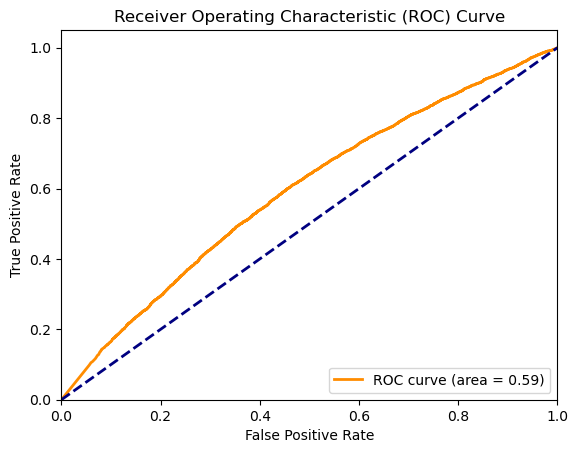

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Load saved predictions
y_test = np.load('y_test.npy')
y_pred_prob = np.load('y_pred_prob.npy')

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


After training the neural network model on the preprocessed dataset, the AUC-ROC curve was plotted to evaluate the model's performance in distinguishing between the positive and negative classes. First, the predicted probabilities (y_pred_prob) for the test data were obtained and saved. Then, the roc_auc_score function was used to calculate the Area Under the Curve (AUC) for the ROC curve, providing a single metric to summarize the model's discriminative ability. The curve plots the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity) across various threshold settings. The area under the curve (AUC) is 0.59, indicating the model's performance is slightly better than random guessing, as an AUC of 0.5 would represent a model with no discrimination capability.

Epoch 1/100
2036/2036 [==============================] - 16s 7ms/step - loss: 0.7058 - accuracy: 0.5382 - val_loss: 0.6773 - val_accuracy: 0.5913 - lr: 0.0010
Epoch 2/100
2036/2036 [==============================] - 11s 5ms/step - loss: 0.6669 - accuracy: 0.5957 - val_loss: 0.6515 - val_accuracy: 0.6203 - lr: 0.0010
Epoch 3/100
2036/2036 [==============================] - 12s 6ms/step - loss: 0.6523 - accuracy: 0.6215 - val_loss: 0.6482 - val_accuracy: 0.6276 - lr: 0.0010
Epoch 4/100
2036/2036 [==============================] - 9s 5ms/step - loss: 0.6403 - accuracy: 0.6389 - val_loss: 0.6437 - val_accuracy: 0.6277 - lr: 0.0010
Epoch 5/100
2036/2036 [==============================] - 9s 4ms/step - loss: 0.6320 - accuracy: 0.6458 - val_loss: 0.6490 - val_accuracy: 0.6299 - lr: 0.0010
Epoch 6/100
2036/2036 [==============================] - 14s 7ms/step - loss: 0.6267 - accuracy: 0.6528 - val_loss: 0.6472 - val_accuracy: 0.6313 - lr: 0.0010
Epoch 7/100
2036/2036 [=========================

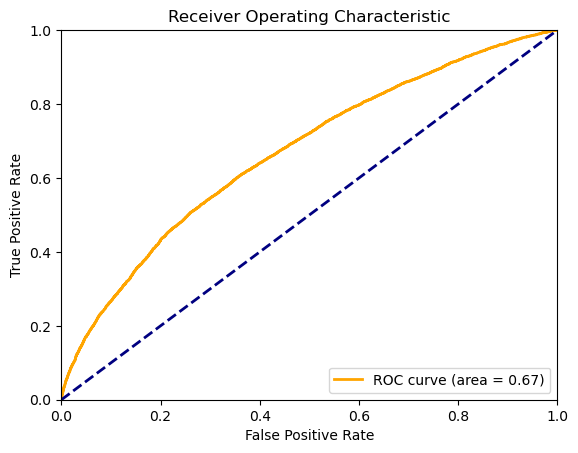

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/model_ready_diabetic_data.csv")

# Split data into features and target
X = data.drop('readmitted', axis=1)
y = data['readmitted']

# Convert target variable to numeric values
y = y.map({'NO': 0, '>30': 1, '<30': 1})

# Convert categorical variables to numerical values using one-hot encoding
X = pd.get_dummies(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions and save the probabilities
y_pred_prob = model.predict(X_test)

# Save predictions to a file (if needed)
import numpy as np
np.save('y_test.npy', y_test)
np.save('y_pred_prob.npy', y_pred_prob)

# Print evaluation metrics
y_pred = (y_pred_prob > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


To improve the neural network model, several enhancements were made. The model complexity was increased by adding more layers and increasing the number of neurons in each layer, which allows the network to learn more complex patterns. Regularization techniques, specifically dropout layers, were added to prevent overfitting by randomly dropping units during training. Early stopping was implemented to halt the training process when the validation loss stopped improving, which helps in avoiding overfitting. Additionally, a learning rate scheduler was integrated to reduce the learning rate when the validation loss plateaued, aiding in better convergence of the model.
The output shows a notable improvement in model performance. The test accuracy increased to 63.03%, and the ROC AUC score improved to 0.6687, indicating better discrimination capability compared to the previous model. The precision, recall, and F1-scores also improved, particularly for the minority class (class 1), showing that the model has become more effective in identifying positive cases. The ROC curve visually confirms these improvements, as it is positioned higher and further to the left than the previous model's curve, demonstrating a better balance between sensitivity and specificity.
